# Primer parcial 
Alisson García Mejía

#### 1. Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes
    
   A. Indicar el porcentaje de la información utilizando los 3 componentes principales

   B. Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

In [3]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

path = r"C:\Users\aliss\Documents\GitHub\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)
df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


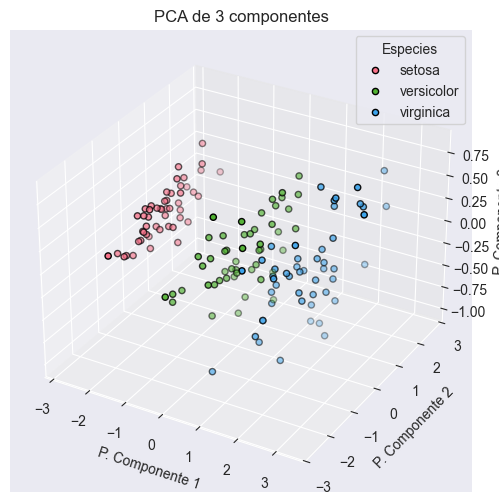

In [4]:
from sklearn.decomposition import PCA

# Normalizar el dataframe
X = df.drop(columns=['Species']) #para descartar "Species"  
y = df['Species'] #etiquetas de clase

#estandarizar / normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método PCA
pca = PCA(n_components=3)
data_proyectada = pca.fit_transform(X_scaled)

#Convertir a dataframe 
df_pca = pd.DataFrame(data_proyectada, columns=['PC1', 'PC2', 'PC3'])
df_pca['Species'] = y 

#ploteamos en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


colors = sns.color_palette('husl', n_colors=df_pca['Species'].nunique())

#Graficar cada especie con su color
for specie, color in zip(df_pca['Species'].unique(), colors):
    subset = df_pca[df_pca['Species'] == specie]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=specie, color=color, edgecolor='k')
    
#Etiquetas de la gráfica
ax.set_xlabel('P. Componente 1')
ax.set_ylabel('P. Componente 2')
ax.set_zlabel('P. Componente 3')
ax.set_title("PCA de 3 componentes")
ax.legend(title='Especies')

plt.show()
    


In [5]:
# Indicar el porcentaje usando los 3 CP 

#mostrar el porcentaje de varianza 
explained_variance = pca.explained_variance_ratio_
total_explained = explained_variance.sum() * 100 #x100 para convertir a porcentaje

print(f"Varianza por cada componente: {explained_variance}")
print(f"Varianza total explicada por los 3 primeros componentes: {total_explained:.2f}%\n")


Varianza por cada componente: [0.72962445 0.22850762 0.03668922]
Varianza total explicada por los 3 primeros componentes: 99.48%

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


#### 2. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain_tumor.csv
    
A. Determinar el porcentaje de aporte de cada vector

B. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos

C. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

D. Hacer la comparación de los pairplot con la data original y la data proyectada 

In [6]:
path2 = r"C:\Users\aliss\Documents\GitHub\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv"
brain_tumor = pd.read_csv(path2)
brain_tumor.head()

# Nota: Hay que descartar 'Class'

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [7]:
#Análisis PCA 
features = brain_tumor.columns[2:] #exluímos las columnas image y class
X = brain_tumor.loc[:, features].values 

#Estandarización
X = StandardScaler().fit_transform(X)

#PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(X)

principal_brain_tumor = pd.DataFrame(data=componentes_principales, columns=['PC1', 'PC2'])

# no sé cuál es el buenooo
print(principal_brain_tumor)

principal_brain_tumor.head()



           PC1       PC2
0     1.134947 -0.116539
1     4.262143  0.049437
2    -2.481383  1.111446
3    -3.074085  0.235259
4     0.900927 -0.311275
...        ...       ...
3757 -0.321001  2.161311
3758 -0.205905  2.131569
3759 -0.203598  1.775664
3760 -0.273145  0.655034
3761  0.308959 -1.213269

[3762 rows x 2 columns]


,PC1,PC2
0,1.134947,-0.116539
1,4.262143,0.049437
2,-2.481383,1.111446
3,-3.074085,0.235259
4,0.900927,-0.311275


In [11]:
# Qué notan de extraño con la columna "Coarseness" al normalizar el dataset? 
columns_to_normalize = brain_tumor.columns.difference(['Image', 'Class'])
scaler = MinMaxScaler()
brain_tumor[columns_to_normalize] = scaler.fit_transform(brain_tumor[columns_to_normalize])

print(brain_tumor)


          Image  Class      Mean  Variance  Standard Deviation   Entropy  \
0        Image1      0  0.194705  0.212023            0.443074  0.274801   
1        Image2      0  0.261489  0.276124            0.510114  0.674843   
2        Image3      1  0.219003  0.392326            0.614200  0.001487   
3        Image4      1  0.177300  0.329007            0.559750  0.001513   
4        Image5      0  0.218223  0.249840            0.483677  0.370574   
...         ...    ...       ...       ...                 ...       ...   
3757  Image3758      0  0.637968  0.414697            0.632375  0.159764   
3758  Image3759      0  0.613869  0.420991            0.637400  0.167358   
3759  Image3760      0  0.540777  0.395000            0.616399  0.171507   
3760  Image3761      0  0.399615  0.324199            0.555410  0.220979   
3761  Image3762      0  0.181883  0.164316            0.386296  0.297948   

      Skewness  Kurtosis  Contrast    Energy       ASM  Homogeneity  \
0     0.068211  

In [9]:
# Determinar el porcentaje de aporte de c/vector
import numpy as np

brain_tumor_numeric = brain_tumor.select_dtypes(include=[np.number])

scaler1 = StandardScaler()
X_scaled1 = scaler1.fit_transform(brain_tumor_numeric)

pca = PCA()
X_pca1 = pca.fit_transform(X_scaled1)

varianza_componente = pca.explained_variance_ratio_ * 100

print("Porcentaje de varianza por cada componente:")
for i, var in enumerate(varianza_componente, 1):
    print(f"Componente [i]: {var:.2f}%")
    


Porcentaje de varianza por cada componente:
Componente [i]: 43.28%
Componente [i]: 28.91%
Componente [i]: 12.22%
Componente [i]: 5.80%
Componente [i]: 4.66%
Componente [i]: 2.08%
Componente [i]: 1.58%
Componente [i]: 0.81%
Componente [i]: 0.26%
Componente [i]: 0.22%
Componente [i]: 0.11%
Componente [i]: 0.08%
Componente [i]: 0.00%
Componente [i]: 0.00%


In [10]:
# Cuantos componentes principales son necesarios para obtener al menos un 90% 

varianza_componente = pca.explained_variance_ratio_ * 100
varianza_acumulativa = np.cumsum(varianza_componente)

num_componentes = np.argmax(varianza_acumulativa >=90) + 1 

print(f"Número de componentes necesarios para explicar al menos el 90% de la varianza: {num_componentes}")

Número de componentes necesarios para explicar al menos el 90% de la varianza: 4


Como es 4 puede que al reducir la dimensionalidad no perdamos información

In [110]:
# Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

#Método_1: usando scikit-learn y pandas
features = brain_tumor.columns[2:]
X = brain_tumor.loc[:, features].values

X = StandardScaler().fit_transform(X)

pca= PCA(n_components=2)
componentes_principales_brain = pca.fit_transform(X)

pca_brain_tumor = pca.fit_transform(X)

pca_brain_tumor = pd.DataFrame(data=pca_brain_tumor, columns=['PC1', 'PC2'])

pca_brain_tumor = pd.concat([pca_brain_tumor, brain_tumor[['Class']]], axis=1)

print(pca_brain_tumor)

           PC1       PC2  Class
0     1.134947 -0.116539      0
1     4.262143  0.049437      0
2    -2.481383  1.111446      1
3    -3.074085  0.235259      1
4     0.900927 -0.311275      0
...        ...       ...    ...
3757 -0.321001  2.161311      0
3758 -0.205905  2.131569      0
3759 -0.203598  1.775664      0
3760 -0.273145  0.655034      0
3761  0.308959 -1.213269      0

[3762 rows x 3 columns]


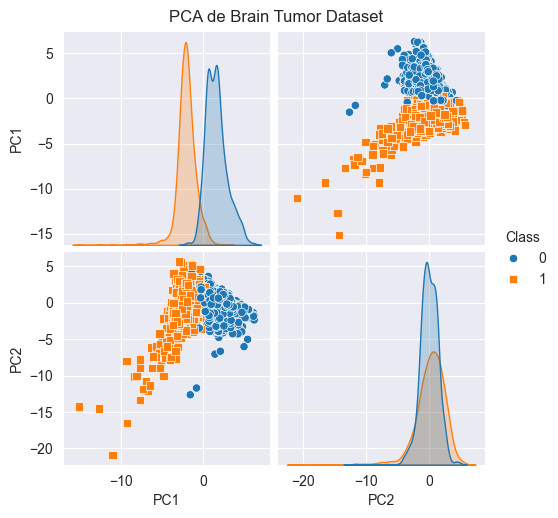

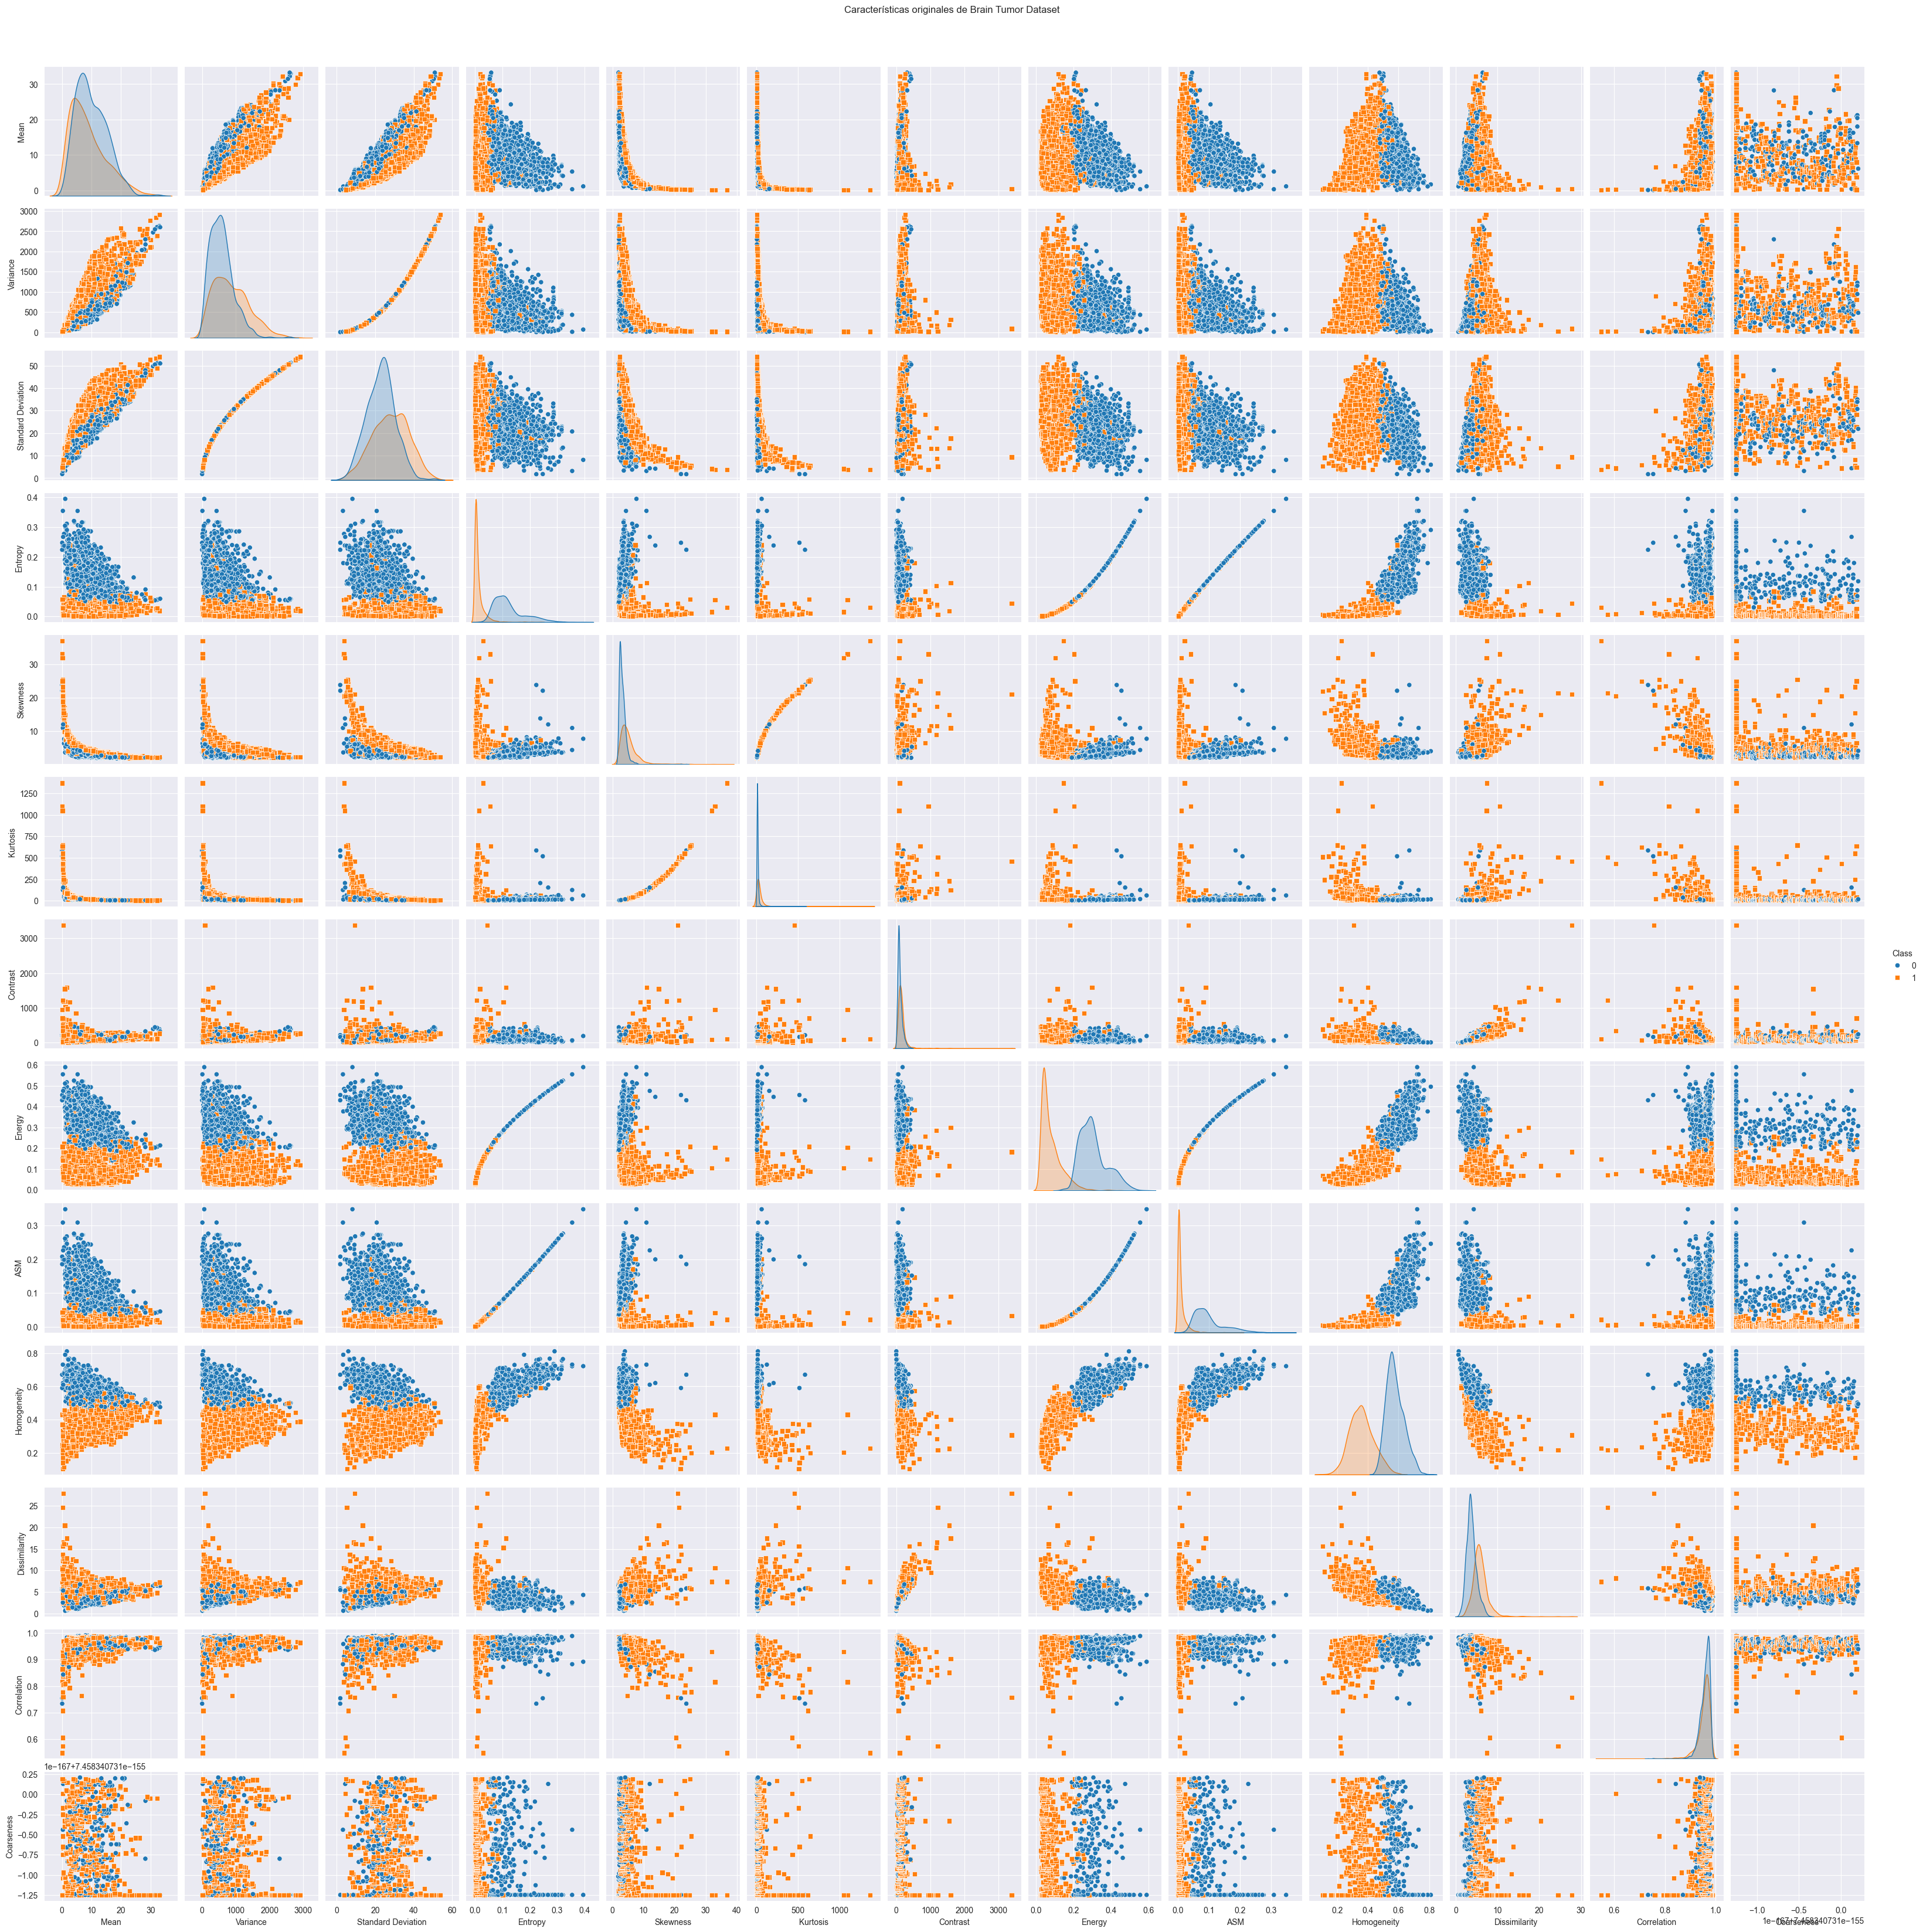

In [101]:
#Otro metodo usando seaborn y visualizar con pairplot
features = brain_tumor.columns[2:] #exluímos las columnas image y class
X = brain_tumor.loc[:, features].values 

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
Componentes_p = pca.fit_transform(X)

pca_brain = pd.DataFrame(data=Componentes_p, columns=['PC1', 'PC2'])

pca_brain = pd.concat([pca_brain, brain_tumor[['Class']]], axis=1)

sns.pairplot(pca_brain, hue='Class', markers=["o", "s"])
plt.suptitle('PCA de Brain Tumor Dataset', y=1.02)
plt.show()

sns.pairplot(brain_tumor, hue='Class', markers=["o", "s"])
plt.suptitle('Características originales de Brain Tumor Dataset', y=1.02)
plt.show()


Análisis: con seaborn y pairplot podemos visualizar mejor gráficamente la proyección de los datos originales al espacio reducido con variables importantes. Podemos visualizar mejor su estructura, ya sea en 2D o 3D. En este último ejemplo, podemos ver que eliminamos muchas características correlacionadas o irrelevantes. 